In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.models import load_model

# Load your trained model
model_path = '/content/drive/Shared drives/DATA 298A/Submissions/ResNet-50_model.h5'
model = load_model(model_path)

Mounted at /content/drive


In [ ]:
class_labels = ['biowaste', 'cardboard', 'clothes','e-waste', 'furniture','glass', 'medical','metal','paper', 'plastic','shoes']

In [ ]:
import numpy as np
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet import preprocess_input

# Path to the folder containing class subfolders
data_dir = '/content/drive/Shared drives/DATA 298A/Code/Data/normalized/'

# Randomly selecting images
selected_images = []
for class_folder in os.listdir(data_dir):
    class_folder_path = os.path.join(data_dir, class_folder)
    if os.path.isdir(class_folder_path):
        images = os.listdir(class_folder_path)
        selected_image = random.choice(images)
        selected_images.append((os.path.join(class_folder_path, selected_image), class_folder))

# Function to preprocess images
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

# Preprocess selected images
preprocessed_images = [preprocess_image(path) for path, label in selected_images]

1/1 [==============================] - 0s 214ms/step


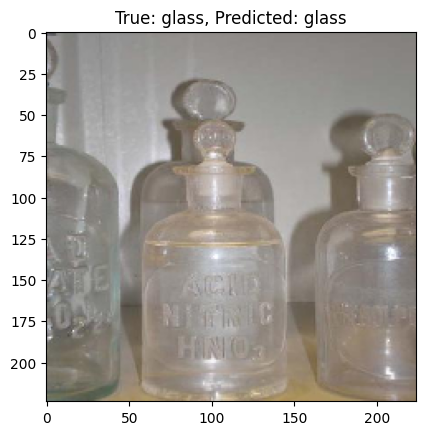

1/1 [==============================] - 0s 377ms/step


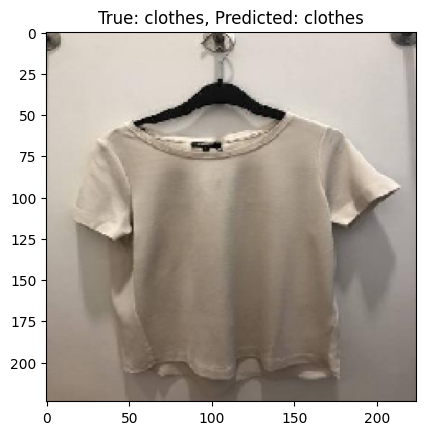

1/1 [==============================] - 0s 361ms/step


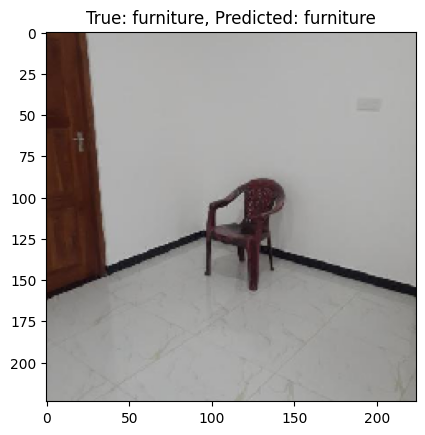

1/1 [==============================] - 0s 371ms/step


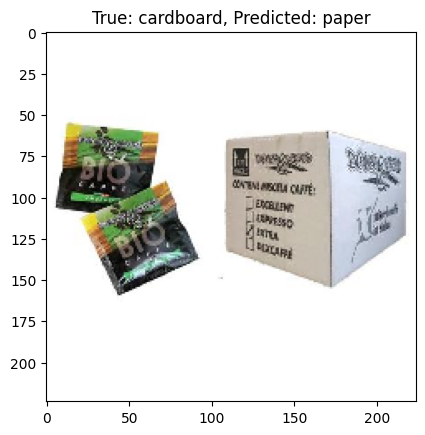

1/1 [==============================] - 0s 335ms/step


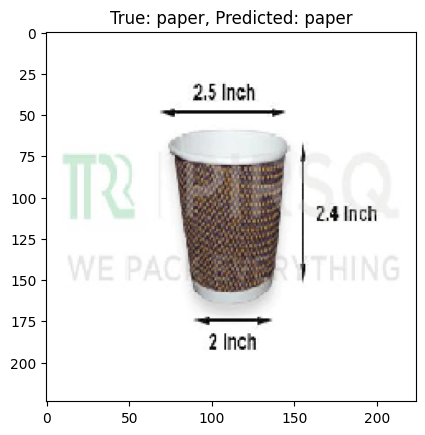

1/1 [==============================] - 0s 378ms/step


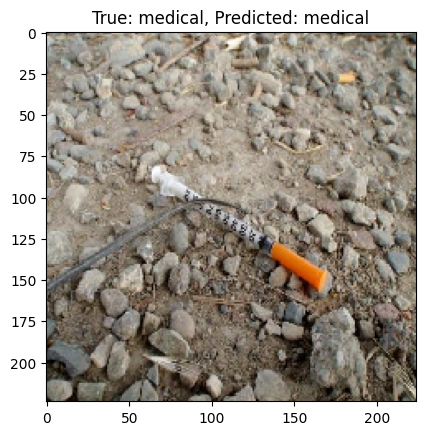

1/1 [==============================] - 0s 373ms/step


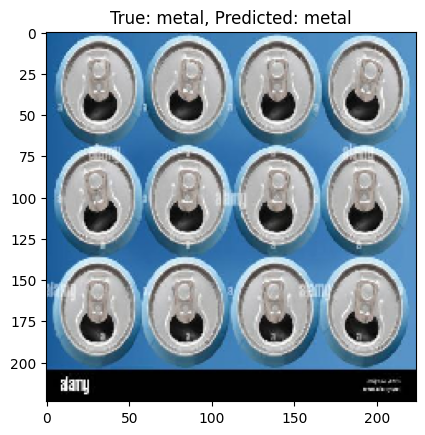

1/1 [==============================] - 0s 365ms/step


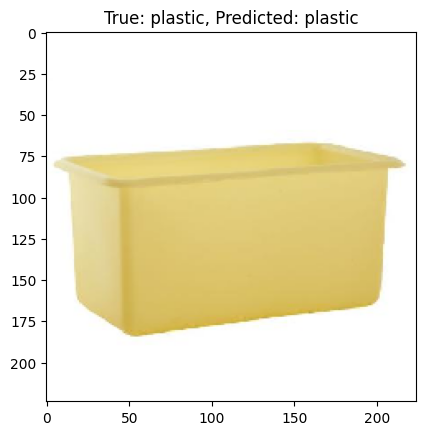

1/1 [==============================] - 0s 352ms/step


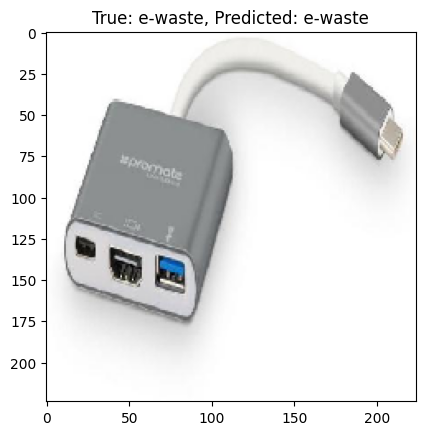

1/1 [==============================] - 0s 234ms/step


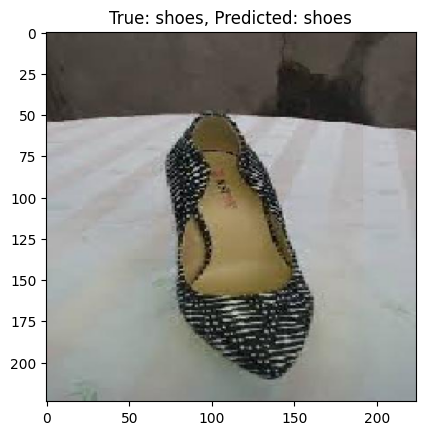

1/1 [==============================] - 0s 202ms/step


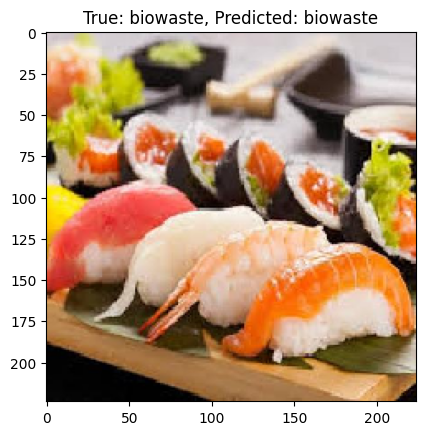

In [ ]:
import matplotlib.pyplot as plt

for i, (image, label) in enumerate(selected_images):
    prediction = model.predict(preprocessed_images[i])
    predicted_class = class_labels[np.argmax(prediction)]

    # Display the image
    img = load_img(image, target_size=(224, 224))
    plt.imshow(img)
    plt.title(f"True: {label}, Predicted: {predicted_class}")
    plt.show()